##5. MODEL TUNING

####LGBM TUNING

In [ ]:
lgbm = LGBMClassifier()

In [ ]:
lgbm_params = {"learning_rate":[0.001,0.01,0.1],
              "n_estimators":[200,500,100],
              "max_depth":[1,2,35,8]}

In [ ]:
lgbm_cv_model = GridSearchCV(lgbm,lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 35, 'n_estimators': 500}

In [ ]:
# final model
lgbm_tuned = LGBMClassifier(learning_rate=0.1, max_depth=8, n_estimators=500).fit(X_train,y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8542600896860987

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       377
           1       0.53      0.55      0.54        69

    accuracy                           0.85       446
   macro avg       0.72      0.73      0.73       446
weighted avg       0.86      0.85      0.86       446



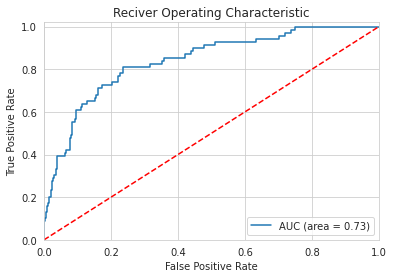

In [ ]:
lgbm_roc_auc = roc_auc_score(y_test, lgbm_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lgbm_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='AUC (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1],[0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Reciver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

####XGBOOST TUNING

In [ ]:
xgb = XGBClassifier()

In [ ]:
# Typical values selected for XGBoost
xgb_params =  {"learning_rate": [0.1,0.001,0.01],
             "n_estimators": [100,500,800,1000],
             "subsample": [0.6,0.8,1],
              "max_depth": [3,5,7]}

In [ ]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.8}

In [ ]:
xgb_tuned = XGBClassifier(learning_rate= 0.1, max_depth=7, n_estimators=500, subsample=0.8).fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.8587443946188341

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       377
           1       0.54      0.59      0.57        69

    accuracy                           0.86       446
   macro avg       0.73      0.75      0.74       446
weighted avg       0.86      0.86      0.86       446



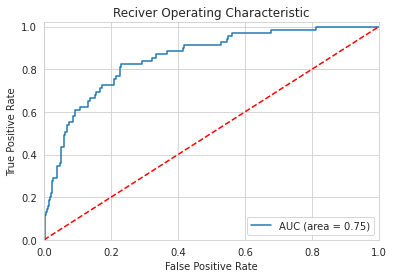

In [ ]:
xgb_roc_auc = roc_auc_score(y_test, xgb_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='AUC (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1],[0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Reciver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

####RANDOM FORESTS TUNING

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf_params = {'n_estimators': [100,200,500,1000],
            "max_features": [3,5,7,8],
            "min_samples_split": [2,5,10,20]}

In [ ]:
rf_cv_model = GridSearchCV(rf,rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
rf_cv_model.best_params_

{'max_features': 3, 'min_samples_split': 2, 'n_estimators': 200}

In [ ]:
# final model
rf_tuned = RandomForestClassifier(max_features=3, min_samples_split=2, n_estimators=200).fit(X_train,y_train)
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

<ipython-input-101-2793d0887784>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tuned = RandomForestClassifier(max_features=3, min_samples_split=2, n_estimators=200).fit(X_train,y_train)


0.852017937219731

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       377
           1       0.52      0.49      0.51        69

    accuracy                           0.85       446
   macro avg       0.72      0.71      0.71       446
weighted avg       0.85      0.85      0.85       446



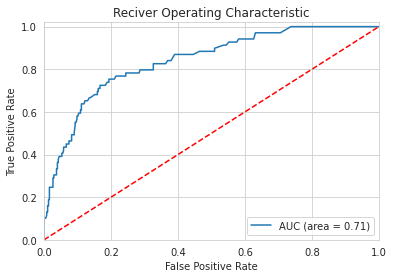

In [ ]:
rf_roc_auc = roc_auc_score(y_test, rf_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='AUC (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1],[0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Reciver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

#BONUS

Lastly, we can compare importance of our new features. Finally, we can look at the importance of our new features. We want to have contributed a little to our model with the features created.

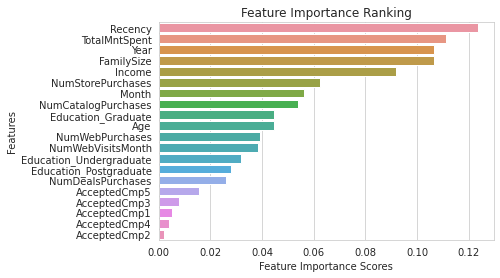

In [ ]:
y_pred = rf_tuned.predict(X_test)

feature_importance = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")
plt.show()

YES! Our new features are at the top of the list of importance.

#CONCLUSION

We achieve the best result with XGBoost. We don't have big data so we can use XGBoost comfortably, but if we had bigger data we would consider using LightGBM Algorithm to reduce computation time.